In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("data\\athlete_events.csv")
region_df = pd.read_csv('data\\noc_regions.csv')

In [56]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [57]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [58]:
df.shape

(271116, 15)

In [59]:
df = df[df['Season'] == 'Summer']

In [60]:
df.shape

(222552, 15)

In [61]:
df = df.merge(region_df,on='NOC',how='left')

In [62]:
df.shape

(222552, 17)

In [63]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [64]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(1385)

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [68]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [69]:
df.shape

(221167, 20)

In [70]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [71]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event'])
medal_tally.shape

(98894, 20)

In [72]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [73]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [74]:
medal_tally.head()

,region,Gold,Silver,Bronze,total
0,USA,622,398,371,1391
1,Russia,415,323,312,1050
2,Germany,330,311,357,998
3,UK,182,207,202,591
4,France,163,166,212,541


In [75]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0,'Overall')

In [77]:
print(years)

['Overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


In [78]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()

In [82]:
print(country)

['Overall', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland'

In [81]:
country.insert(0,'Overall')

In [83]:
medal_df = df.drop_duplicates(subset=['Year','NOC','Games','Team','City','Sport','Event','Medal'])

In [110]:
def fetch_medal_tally(df,year, country):
    medal_df = df.drop_duplicates(subset=['Year','NOC','Games','Team','City','Sport','Event','Medal'])
    flag = 0

    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df

    elif year == 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]

    elif country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]

    else:
        temp_df = medal_df[
            (medal_df['region'] == country) &
            (medal_df['Year'] == int(year))
        ]

    if flag == 1:
        x = temp_df.groupby('Year')[['Gold','Silver','Bronze']]\
                   .sum()\
                   .sort_values('Year', ascending=False)\
                   .reset_index()
    else:
        x = temp_df.groupby('region')[['Gold','Silver','Bronze']]\
                   .sum()\
                   .sort_values('Gold', ascending=False)\
                   .reset_index()

    return x

In [106]:
medal_df[medal_df['Year'] == int('2012')]
#type(medal_df['Year'][0])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
48,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN,France,NaN,False,False,False
72,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN,Morocco,NaN,False,False,False
102,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN,Russia,NaN,False,False,False
112,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France,NaN,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222434,135489,Anastasiya Valeryevna Zuyeva-Fesikova,F,22.0,182.0,71.0,Russia,RUS,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,Silver,Russia,NaN,False,False,True
222465,135505,Armands Zvirbulis,M,24.0,177.0,84.0,Latvia,LAT,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN,Latvia,NaN,False,False,False
222480,135516,Krzysztof Maciej Zwarycz,M,21.0,170.0,77.0,Poland,POL,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Middleweight,NaN,Poland,NaN,False,False,False
222499,135528,Marc Zwiebler,M,28.0,181.0,75.0,Germany,GER,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Singles,NaN,Germany,NaN,False,False,False


In [109]:
fetch_medal_tally(df,'2016','India')

,region,Gold,Silver,Bronze
0,India,0,1,1


In [115]:
df['Year'].unique().shape[0]-1

28

In [118]:
df['City'].unique().shape[0]

23

In [119]:
df['Sport'].unique().shape[0]

52

In [120]:
df['Event'].unique().shape[0]

651

In [121]:
df['Name'].unique().shape[0]

116122

In [122]:
df['region'].unique().shape[0]

206

In [127]:
nations_overtime = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_overtime

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


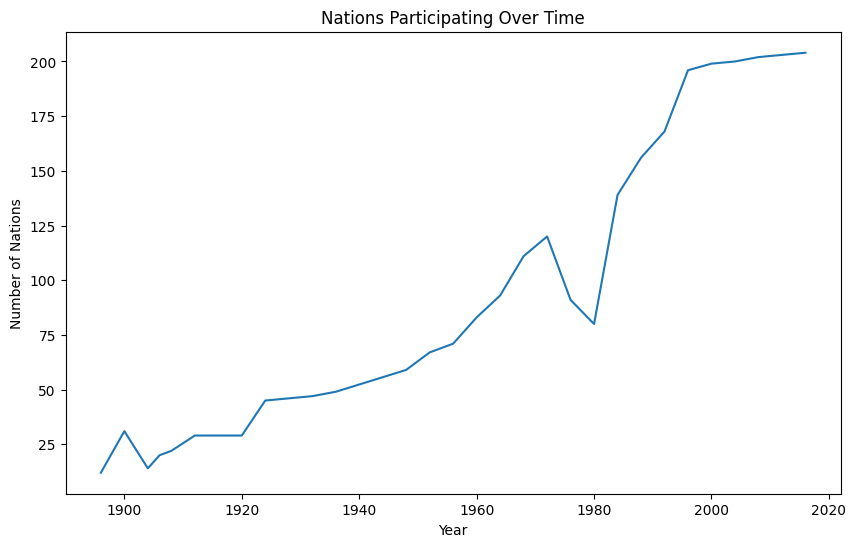

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(nations_overtime['Year'], nations_overtime['count'])

plt.xlabel("Year")
plt.ylabel("Number of Nations")
plt.title("Nations Participating Over Time")

plt.show()

In [152]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

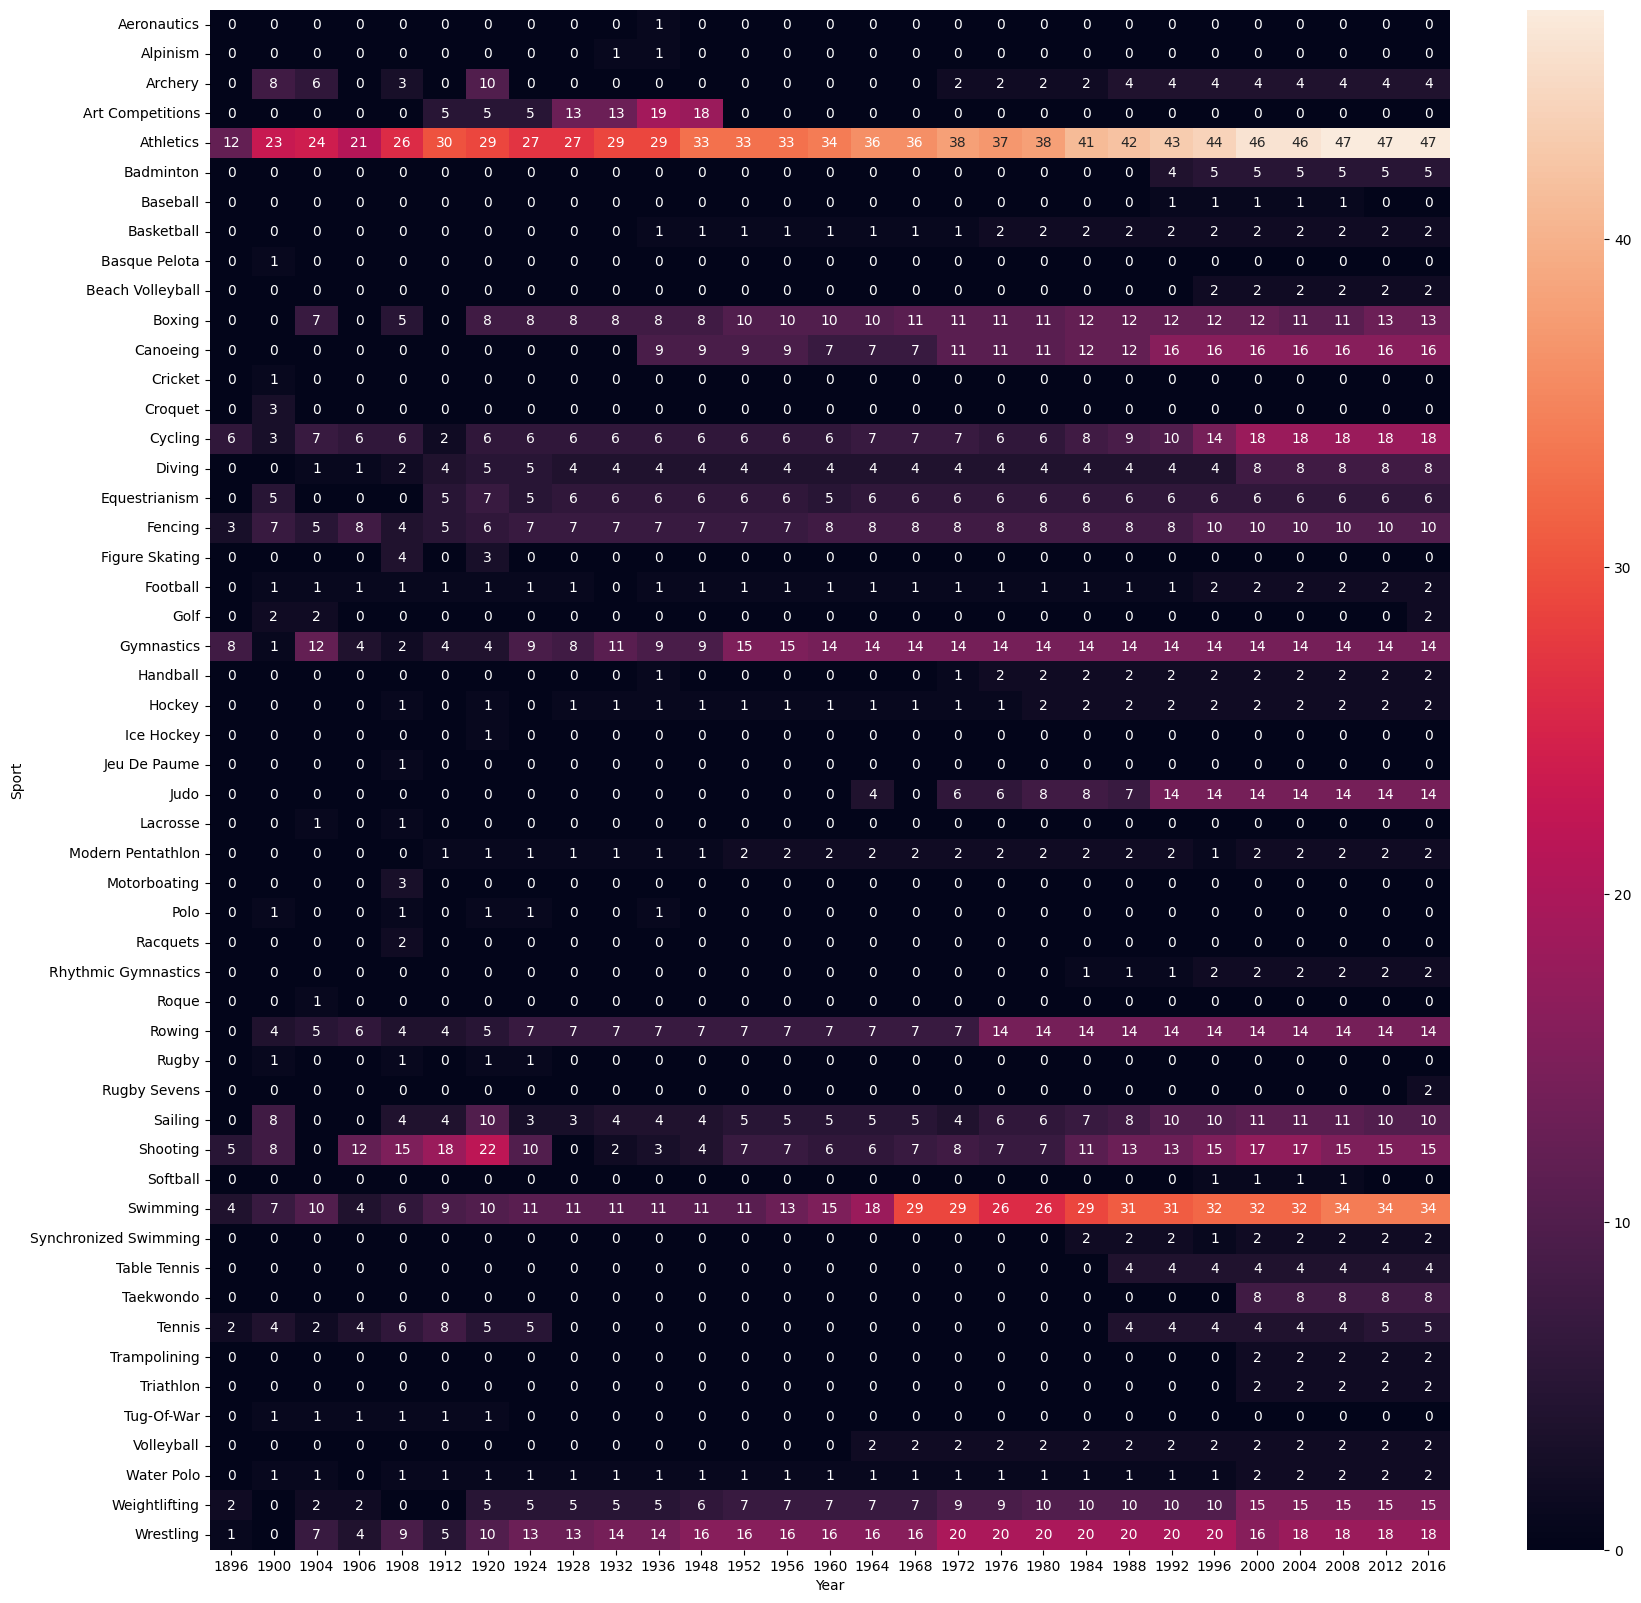

In [154]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [155]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

# Country wise

In [156]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team' ,'NOC' ,'Games','Year' ,'City','Sport','Event' ,'Medal' ], inplace=True)

D:\Test\ipykernel_5736\3239006922.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
new_df =  temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

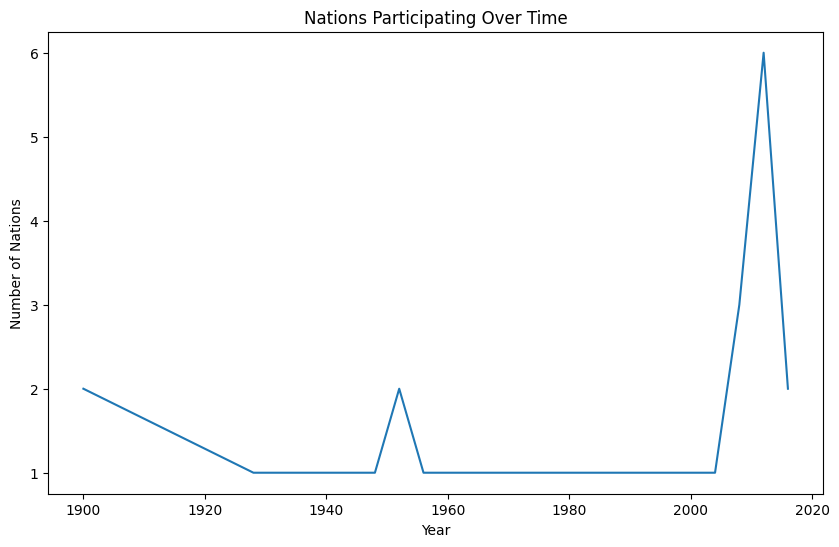

In [165]:
plt.figure(figsize=(10,6))
plt.plot(final_df['Year'], final_df['Medal'])

plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.title("No of Medals Over Time")

plt.show()